In [1]:
import numpy as np

In [2]:
from DataLoad import load_to_dataframe
df, df_raw, class_dict = load_to_dataframe()

In [5]:
from feature_generator import create_features

In [6]:
features, labels = create_features(df_raw, 'FFT_Absolute_1.txt')

Absolut Values of fast fourier Transform
Hop_length:  1024
Sampling Rate: 44100
Fast Fourier Window: 1024
Shape of Feature:  [513, 130, 1]


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size=0.3)

In [9]:
from tensorflow.keras.utils import Sequence

In [10]:
class SoundSequence(Sequence):

    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]

        return (np.array(batch_x), np.array(batch_y))

In [11]:
train_gen = SoundSequence(X_train, y_train, 30)

In [12]:
test_gen = SoundSequence(X_test, y_test, 30)

In [13]:
train_gen[8][1]

array([ 8,  7,  2,  1,  6,  6,  3,  2,  3, 10,  1,  2,  7,  9,  7,  7,  3,
        3,  3,  7, 10,  3, 10,  9,  6, 10,  9,  7,  0, 10])

In [14]:
features.shape[1:]

(513, 130, 1)

In [15]:
from tensorflow.keras import layers, models
input_shape = features.shape

num_filters = 8
filter_size = 3

model = models.Sequential()
#model.add(layers.Conv1D(1, kernel_size = 200, input_shape=(13299,1))) #
model.add(layers.Conv2D(32,(2,5), activation="relu", input_shape=(X_train.shape[1:])))#(15,130,1)))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(LSTM(64))
model.add(layers.Conv2D(64, (2,5), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (2, 5), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.SpatialDropout2D(0.5))
#model.add(layers.Dropout(0.5))
#
model.add(layers.Flatten())
model.add(layers.Dense(11, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 512, 126, 32)      352       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 63, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 255, 59, 64)       20544     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 29, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 25, 128)      82048     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 12, 128)       0         
_________________________________________________________________
spatial_dropout2d (SpatialDr (None, 63, 12, 128)       0

In [16]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
history = model.fit(
    train_gen,
    steps_per_epoch=30,
    epochs=30,
    validation_data=test_gen,
    validation_steps=30
    )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 30 steps, validate for 30 steps
Epoch 1/30
30/30 [==============================] - 43s 1s/step - loss: 2.0856 - accuracy: 0.2567 - val_loss: 2.1341 - val_accuracy: 0.2744
Epoch 2/30
30/30 [==============================] - 43s 1s/step - loss: 2.0868 - accuracy: 0.2661 - val_loss: 2.0709 - val_accuracy: 0.2911
Epoch 3/30
30/30 [==============================] - 43s 1s/step - loss: 2.0731 - accuracy: 0.2967 - val_loss: 2.0675 - val_accuracy: 0.2833
Epoch 4/30
30/30 [==============================] - 43s 1s/step - loss: 2.0536 - accuracy: 0.2956 - val_loss: 2.1100 - val_accuracy: 0.2744
Epoch 5/30
30/30 [==============================] - 43s 1s/step - loss: 1.9937 - accuracy: 0.3046 - val_loss: 2.1018 - val_accuracy: 0.2644
Epoch 6/30
30/30 [==============================] - 44s 1s/step - loss: 2.0288 - accuracy: 0.2989 - val_loss: 2.0659 - val_accuracy: 0.3011
Epoch 7/30
30/30 [==============================] - 45s 2s/step - lo

In [123]:
history = model.fit(
    X_train, y_train,
#    steps_per_epoch=10,
    epochs=30,
    validation_data=(X_test, y_test)
#    validation_steps=50
)

Train on 4693 samples, validate on 2012 samples
Epoch 1/30
4693/4693 [==============================] - 5s 1ms/sample - loss: 2.3414 - accuracy: 0.1481 - val_loss: 2.3035 - val_accuracy: 0.1605
Epoch 2/30
4693/4693 [==============================] - 5s 1ms/sample - loss: 2.2882 - accuracy: 0.1818 - val_loss: 2.2464 - val_accuracy: 0.1948
Epoch 3/30
4693/4693 [==============================] - 5s 1ms/sample - loss: 2.2374 - accuracy: 0.1916 - val_loss: 2.2242 - val_accuracy: 0.2137
Epoch 4/30
4693/4693 [==============================] - 5s 1ms/sample - loss: 2.2169 - accuracy: 0.2188 - val_loss: 2.1673 - val_accuracy: 0.2584
Epoch 5/30
4693/4693 [==============================] - 5s 1ms/sample - loss: 2.1829 - accuracy: 0.2306 - val_loss: 2.1490 - val_accuracy: 0.2604
Epoch 6/30
4693/4693 [==============================] - 5s 1ms/sample - loss: 2.1582 - accuracy: 0.2389 - val_loss: 2.1295 - val_accuracy: 0.2470
Epoch 7/30
4693/4693 [==============================] - 5s 1ms/sample - loss

In [20]:
from PlotModel import plot_model_history

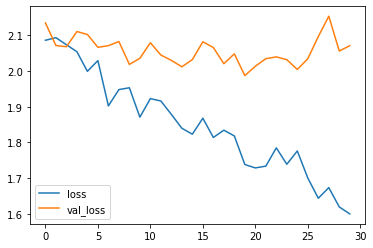

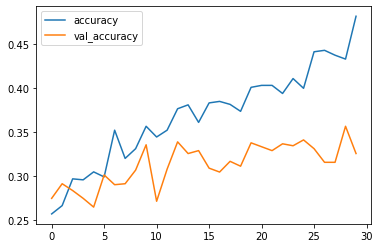

In [21]:
plot_model_history(model)

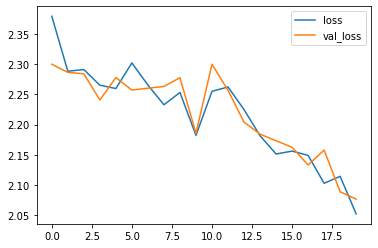

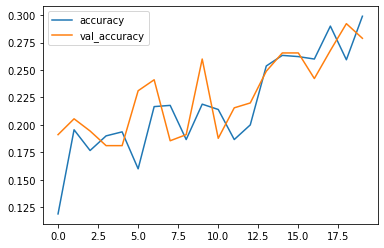

In [18]:
import matplotlib.pyplot as plt
plt.plot(model.history.history["loss"], label="loss")
plt.plot(model.history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()

plt.plot(model.history.history["accuracy"], label="accuracy")
plt.plot(model.history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()
plt.close()

In [22]:
featured_model = 'FFT_Absolute_1'

In [ ]:
!mkdir -p saved_models
model.save('saved_models/' + featured_model + ".mdl") 